<a href="https://colab.research.google.com/github/indiantechwarrior/ImageClassificationUsingKeras/blob/main/Simple_CNN__Image_Classification_Model_on_MNIST_using_Keras_Conv2D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Step 1 - Load DataSet**

In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


**Step 2 - Data Analysis** 

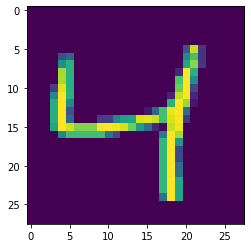

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X_train[2])

In [ ]:
X_train[2].shape

(28, 28)

 **Step 3 - Pre-processing Data**

**reshape the dataset**

In [ ]:
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

**apply one-hot-encode**



In [ ]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[2]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

**Step 4 - Build the model**

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) 
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

**Step 5 - Compile the model**

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

**Step 6 - Train the model**


In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=3)

Epoch 1/3
1875/1875 [==============================] - 68s 36ms/step - loss: 0.9040 - accuracy: 0.8696 - val_loss: 0.1113 - val_accuracy: 0.9657
Epoch 2/3
1875/1875 [==============================] - 67s 36ms/step - loss: 0.0773 - accuracy: 0.9766 - val_loss: 0.0599 - val_accuracy: 0.9806
Epoch 3/3
1875/1875 [==============================] - 69s 37ms/step - loss: 0.0589 - accuracy: 0.9815 - val_loss: 0.0589 - val_accuracy: 0.9825


**Step 7 - Prediction using model**

In [ ]:
model.predict(X_test[:4])

array([[1.3102794e-08, 5.7612088e-09, 2.5358004e-06, 1.0725582e-05,
        4.0970023e-11, 1.2555329e-11, 1.3442111e-14, 9.9998653e-01,
        2.8975186e-10, 1.9177338e-07],
       [1.1750292e-05, 4.3714895e-06, 9.9994528e-01, 8.6990656e-07,
        4.8572701e-09, 1.3811893e-12, 3.6416524e-05, 2.6864830e-10,
        1.1470223e-06, 7.8156409e-10],
       [9.6163103e-07, 9.9980944e-01, 2.6646937e-06, 8.0516713e-09,
        1.5982852e-04, 1.2285403e-06, 3.3691408e-06, 1.2078067e-05,
        1.0010319e-05, 4.8704840e-07],
       [9.9970251e-01, 4.5743329e-10, 2.2501531e-07, 3.0575620e-09,
        5.6131086e-07, 9.9300532e-09, 2.9205516e-04, 9.7944253e-10,
        3.4157374e-06, 1.1490416e-06]], dtype=float32)

**Step 8 - Final Ouput**

In [ ]:
y_test[:4]

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)